In [ ]:
url = "https://raw.githubusercontent.com/smartmira/datasets/main/Titanic-Dataset.csv"

# problem definition

in this project we're trying to see if we can use machine learning to create a model that predicts which passengers survived the Titanic shipwreck

# data
we were able to get our data from kaggle,the link below contains the information needed to properly understand the titanic dataset
https://www.kaggle.com/competitions/titanic/data

# features
* target column:survival	Survival	0 = No, 1 = Yes
*pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	0=female, 1=male
* Age	Age in years
* sibsp	# of siblings / spouses aboard the Titanic
* parch	# of parents / children aboard the Titanic
* ticket	Ticket number
* fare	Passenger fare
* cabin	Cabin number
*embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# evaluation
we aimimg to get 90% out of our proof of concept


In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


## EXPLORATORY DATA ANALYSIS

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<ipython-input-7-c735f285a60c>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["no", "yes"]);


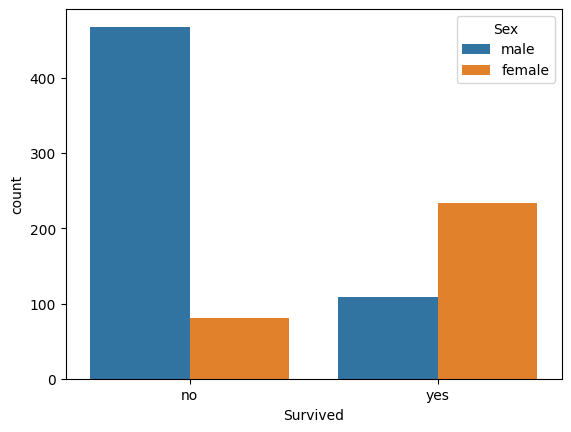

In [ ]:
ax = sns.countplot(data=df, x="Survived", hue="Sex")
ax.set_xticklabels(["no", "yes"]);

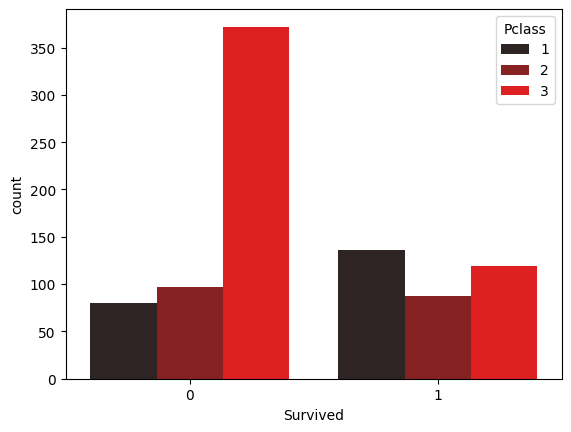

In [ ]:
ax = sns.countplot(data=df, x="Survived", hue="Pclass", palette="dark:red")

<ipython-input-9-b8eb2b161a67>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  ax = sns.countplot(data=df, x="Survived", hue="Parch", color="red")


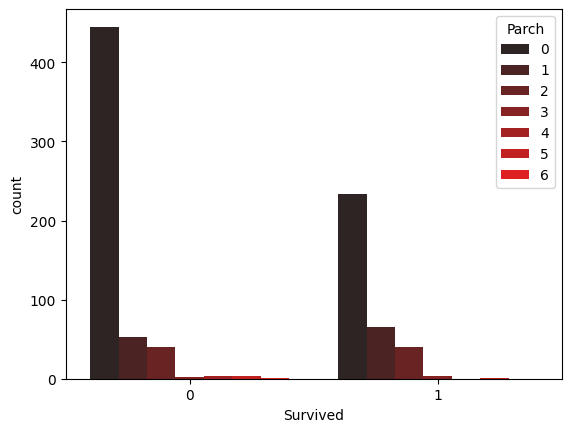

In [ ]:
ax = sns.countplot(data=df, x="Survived", hue="Parch", color="red")

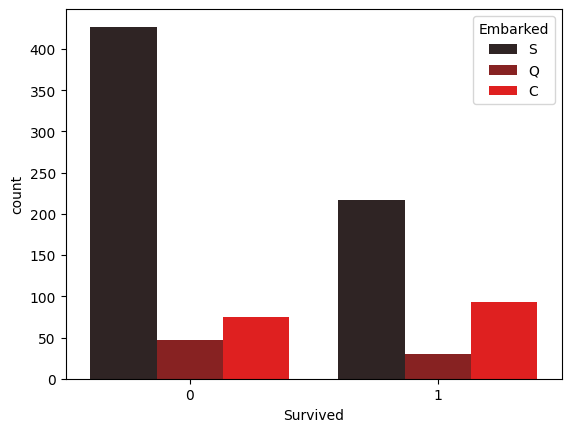

In [ ]:
ax = sns.countplot(data=df, x="Survived", hue="Embarked", palette="dark:red")

In [ ]:
pd.crosstab(df.Embarked, df.Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [ ]:
pd.crosstab(df.Parch, df.Survived)

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [ ]:
pd.crosstab(df.PassengerId, df.Survived).head(10)

Survived,0,1
PassengerId,,
1,1,0
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0
9,0,1


<Axes: xlabel='Age', ylabel='Count'>

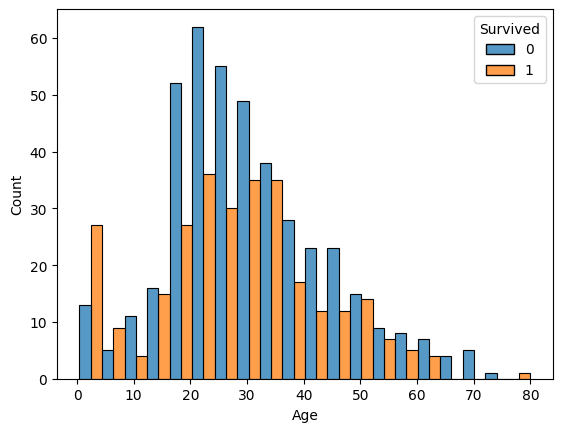

In [ ]:
fig, ax = plt.subplots()
sns.histplot(
    data=df, x='Age', hue='Survived', multiple='dodge',
      ax=ax)

In [ ]:
## Checking mising values
df.isna().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


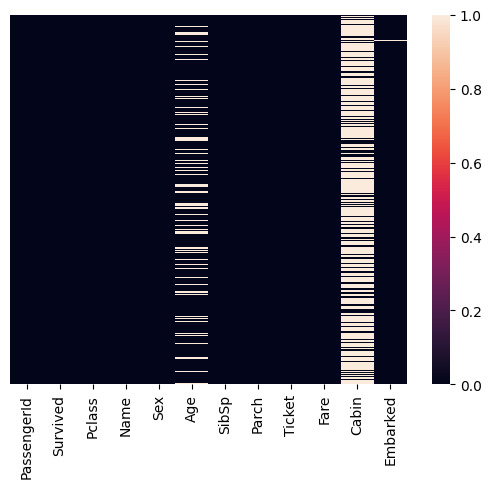

In [ ]:
sns.heatmap(df.isna(),yticklabels=False);

In [ ]:
# lets fill missing values
# we will fill Age with average age
# Emnarked with median
# And drop cabin because it has alot of missing values

df.Age = df['Age'].fillna(np.mean(df.Age))
df.Embarked = df.Embarked.fillna('S')
df.drop('Cabin',axis=1, inplace=True)

In [ ]:
df.value_counts()

,,,,,,,,,,,count
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250,S,1
599,0,3,"Boulos, Mr. Hanna",male,29.699118,0,0,2664,7.225,C,1
588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.000000,1,1,13567,79.200,C,1
589,0,3,"Gilinski, Mr. Eliezer",male,22.000000,0,0,14973,8.050,S,1
590,0,3,"Murdlin, Mr. Joseph",male,29.699118,0,0,A./5. 3235,8.050,S,1
...,...,...,...,...,...,...,...,...,...,...,...
301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,29.699118,0,0,9234,7.750,Q,1
302,1,3,"McCoy, Mr. Bernard",male,29.699118,2,0,367226,23.250,Q,1
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.000,S,1


In [ ]:
len(df)

891

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df.isna().sum() / len(df.isna())

,0
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


In [ ]:
 df.drop("Ticket", axis=1, inplace=True)
# df.drop("Name", axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# le = LabelEncoder()
# df.Sex = le.fit_transform(df.Sex)

# le = LabelEncoder()
# df.Embarked = le.fit_transform(df.Embarked)

In [ ]:
 X = df.drop("Survived", axis=1)
 y = df["Survived"]
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=0.2)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categorical_features = ["Name", "Embarked", "Sex"]
# one_hot = OneHotEncoder(sparse_output=False)
# transformer = ColumnTransformer([("one_hot",
#                                   one_hot,
#                                   categorical_features)],
#                                 remainder="passthrough")

# X = transformer.fit_transform(X)
# X

In [ ]:
cat_features = X.select_dtypes(include = "object").columns
num_features = X.select_dtypes(exclude = "object").columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
one_transformer = OneHotEncoder(drop="first")
preprocessor = ColumnTransformer([
    ("OneHotEncoder",one_transformer,cat_features),
    ("Standardscaler",numeric_transformer,num_features)
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['Name', 'Sex', 'Embarked'], dtype='object')),
                                ('Standardscaler', StandardScaler(),
                                 Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))])

In [ ]:
 X = preprocessor.fit_transform(X)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
    """
    performs evaluation comparism on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [ ]:

 np.random.seed(42)

# #shuffle the data
 #titanic = df.sample(frac=1)

 #X = df.drop("Survived", axis=1)
 #y = df["Survived"]


 # split the data into train, validation and test sets
 train_split = round(0.7 * len(df))#70% of data
 valid_split = round(train_split + 0.3 * len(df)) # 15% of data
 X_train, y_train = X[:train_split], y[:train_split]
 X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
 #X_test, y_test = X[valid_split:], y[valid_split:]

 clf = RandomForestClassifier()
 clf.fit(X_train, y_train)

 # make baseline predictions
 y_preds = clf.predict(X_valid)

 # Evaluate the classifier on validation set
 baseline_metrics = evaluate_preds(y_valid, y_preds)
 baseline_metrics

Acc: 80.90%
Precision: 0.80
Recall: 0.62
F1 score: 0.70


{'accuracy': 0.81, 'precision': 0.8, 'recall': 0.62, 'f1': 0.7}

In [ ]:
pd.DataFrame(X_train)

,0
0,"(0, 107)\t1.0\n (0, 890)\t1.0\n (0, 892)\t..."
1,"(0, 189)\t1.0\n (0, 893)\t-1.72622007387160..."
2,"(0, 352)\t1.0\n (0, 892)\t1.0\n (0, 893)\t..."
3,"(0, 271)\t1.0\n (0, 892)\t1.0\n (0, 893)\t..."
4,"(0, 14)\t1.0\n (0, 890)\t1.0\n (0, 892)\t1..."
...,...
619,"(0, 278)\t1.0\n (0, 890)\t1.0\n (0, 892)\t..."
620,"(0, 874)\t1.0\n (0, 890)\t1.0\n (0, 893)\t..."
621,"(0, 438)\t1.0\n (0, 890)\t1.0\n (0, 892)\t..."
622,"(0, 572)\t1.0\n (0, 890)\t1.0\n (0, 893)\t..."


In [ ]:
models = {"Logistic": LogisticRegression(),
          "Random": RandomForestClassifier(),
          "Gradient": GradientBoostingClassifier()

}

def fit_and_score(models, X_train, y_train, X_valid, y_valid):
  np.random.seed(42)
  model_scores = {}
  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_valid, y_valid)

  return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             y_train=y_train,
                             X_valid=X_valid,
                             y_valid=y_valid)
model_scores

{'Logistic': 0.7865168539325843,
 'Random': 0.8089887640449438,
 'Gradient': 0.8277153558052435}

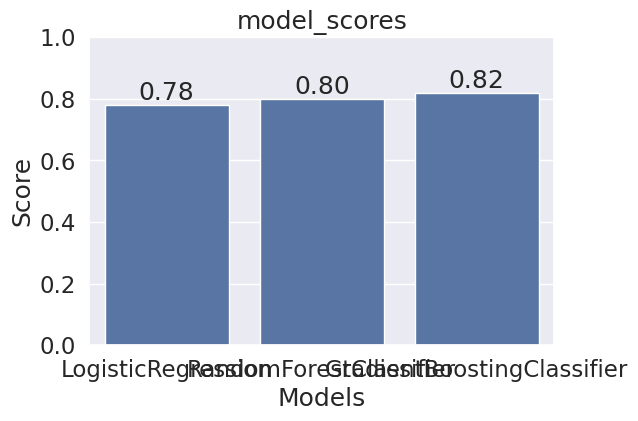

In [ ]:
sns.set(font_scale=1.5)

def plot_model_scores(Logistic, Random, Gradient):
    """
    plots a nice looking confusion matrix using seaborn's heatmap()
    """
    # create a dataframe with provided metrics
    model_scores = pd.DataFrame({"Models": ["LogisticRegression", "RandomForestClassifier", "GradientBoostingClassifier"],
                                 "Score": [Logistic, Random, Gradient]})

    #transpose dataframe to have metrics as rows
    #cv_metrics = cv_metrics.T

    #create bar plot
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.barplot(x="Models", y="Score", data=model_scores, ax=ax)
    ax.set_ylim(0, 1) #sets y-axis limits
    plt.title("model_scores")
    for i, score in enumerate(model_scores["Score"]):
        ax.text(i, score + 0.00, f'{score:.2f}', ha='center', va='bottom')
    plt.show()

Logistic = 0.78
Random = 0.80
Gradient = 0.82


plot_model_scores(Logistic, Random, Gradient)

In [ ]:
gcb={
    "loss":['log_loss','exponential'],
    "n_estimators":np.arange(10,100,10),
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(10,50,10),
    "max_features":[0.5,1,'sqrt', 'log2'],
    "max_depth":[None,3,5,10],
    "learning_rate":[0.1,0.5,1.0,1.5]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
%%time
gcb_model = RandomizedSearchCV(GradientBoostingClassifier(
                                                          random_state=42),
                               param_distributions=gcb,
                               n_iter=5,
                               cv=5,
                               verbose=True)
gcb_model.fit(X_train,y_train)





Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: user 3.45 s, sys: 23 ms, total: 3.47 s
Wall time: 7.05 s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'learning_rate': [0.1, 0.5, 1.0, 1.5],
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([10, 20, 30, 40]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
gcb_model.best_params_



{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 30,
 'max_features': 0.5,
 'max_depth': 10,
 'loss': 'exponential',
 'learning_rate': 1.5}

In [ ]:
y_preds1 = gcb_model.predict(X_valid)

In [ ]:
def evaluate_preds(y_valid, y_preds1):
  accuracy = accuracy_score(y_valid, y_preds1)
  precision = precision_score(y_valid,y_preds1)
  recall = recall_score(y_valid, y_preds1)
  f1 = f1_score(y_valid, y_preds1)
  metric_dict={"Accuracy": round(accuracy, 2),
               "Precison": round(precision, 2),
               "Recall": round(recall,2),
               "f1": round(f1,2)}
  print(f"Acc: {accuracy * 100:.2f}%")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"f1 score: {f1:.2f}%")


  return metric_dict





In [ ]:
evaluate_preds(y_valid, y_preds1)

Acc: 79.03%
Precision: 0.70
Recall: 0.74
f1 score: 0.72%


{'Accuracy': 0.79, 'Precison': 0.7, 'Recall': 0.74, 'f1': 0.72}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
gcb_grid = {
    'learning_rate': [0.01, 0.1],
    'loss': ['exponential', 'log_loss'],  # Replace 'deviance' with 'log_loss'
    'max_depth': [3, 5],
    'max_features': [0.5, 1.0],
    'min_samples_leaf': [20, 50],
    'min_samples_split': [2, 10],
    'n_estimators': [50, 100],
}


# Initialize GridSearchCV
gcb_gridm = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=gcb_grid,  # Use param_grid instead of param_distributions
    cv=5,
    verbose=True
)

# Fit GridSearchCV
gcb_gridm.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", gcb_gridm.best_params_)
#print("Best score found: ", gcb_gridm.best_score_)


Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters found:  {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 0.5, 'min_samples_leaf': 20, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
y_preds2 = gcb_gridm.predict(X_valid)

In [ ]:
def evaluate_preds(y_valid, y_preds2):
  accuracy = accuracy_score(y_valid, y_preds2)
  precision = precision_score(y_valid,y_preds2)
  recall = recall_score(y_valid, y_preds2)
  f1 = f1_score(y_valid, y_preds2)
  metric_dict={"Accuracy": round(accuracy, 2),
               "Precison": round(precision, 2),
               "Recall": round(recall,2),
               "f1": round(f1,2)}
  print(f"Acc: {accuracy * 100:.2f}%")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"f1 score: {f1:.2f}%")


  return metric_dict

In [ ]:
evaluate_preds(y_valid, y_preds2)

Acc: 83.52%
Precision: 0.83
Recall: 0.68
f1 score: 0.75%


{'Accuracy': 0.84, 'Precison': 0.83, 'Recall': 0.68, 'f1': 0.75}

In [ ]:
y_preds2

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0])

In [ ]:
y_valid

,Survived
624,0
625,0
626,0
627,1
628,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
# plot ROC curve and calculate AUC metric
from sklearn.metrics import RocCurveDisplay

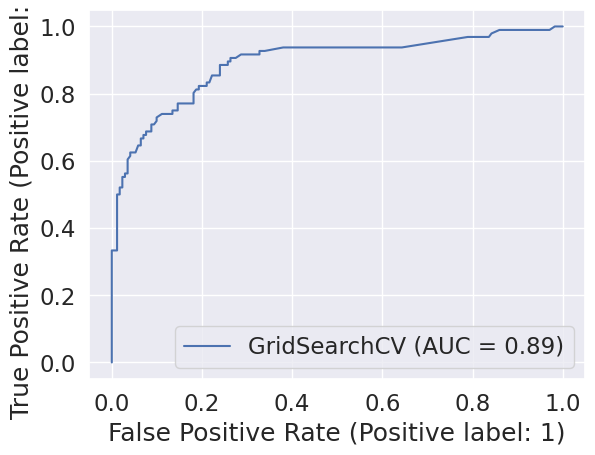

In [ ]:
RocCurveDisplay.from_estimator(gcb_gridm, X_valid, y_valid)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_valid, y_preds2))

[[158  13]
 [ 31  65]]


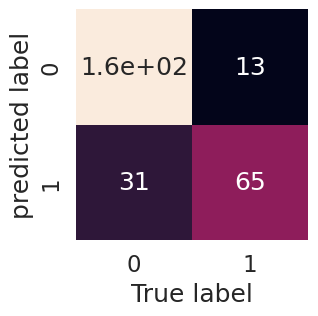

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds2),
                   annot=True,
                   cbar=False)
  plt.xlabel("True label")
  plt.ylabel("predicted label")

plot_conf_mat(y_valid, y_preds2)


In [ ]:
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       171
           1       0.80      0.62      0.70        96

    accuracy                           0.81       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.81      0.81      0.80       267



In [ ]:
gcb_gridm.best_params_

{'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 3,
 'max_features': 0.5,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
clf = GradientBoostingClassifier(
    learning_rate=0.1,  # Replace with the intended value
    max_depth=5,
    max_features=1.0,
    min_samples_leaf=50,
    min_samples_split=10,
    n_estimators=100,
    loss='exponential'
)



In [ ]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.78212291, 0.8258427 , 0.86516854, 0.82022472, 0.83146067])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8249639068482832

In [ ]:
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8402116402116402

In [ ]:
cv_recall = cross_val_score(clf,
                               X,
                               y,
                               cv=10,
                               scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.7051260504201681

In [ ]:
cv_f1 = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="f1")
cv_f1=np.mean(cv_precision)
cv_f1

0.8402116402116402

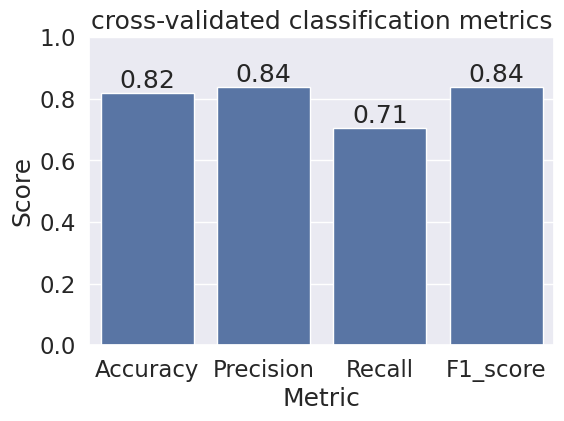

In [ ]:
sns.set(font_scale=1.5)

def plot_cross_val_score(cv_acc,cv_precision, cv_recall, cv_f1):
    """
    plots a nice looking confusion matrix using seaborn's heatmap()
    """
    # create a dataframe with provided metrics
    cv_metrics = pd.DataFrame({"Metric": ["Accuracy", "Precision", "Recall", "F1_score"],
                               "Score": [cv_acc, cv_precision, cv_recall, cv_f1]})

    #transpose dataframe to have metrics as rows
    #cv_metrics = cv_metrics.T

    #create bar plot
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.barplot(x="Metric", y="Score", data=cv_metrics, ax=ax)
    ax.set_ylim(0, 1) #sets y-axis limits
    plt.title("cross-validated classification metrics")
    for i, score in enumerate(cv_metrics["Score"]):
        ax.text(i, score + 0.00, f'{score:.2f}', ha='center', va='bottom')
    plt.show()

cv_acc = 0.82
cv_precision = 0.84
c_recall = 0.70
cv_f1 = 0.84

plot_cross_val_score(cv_acc, cv_precision, cv_recall, cv_f1)

In [ ]:
df_train = pd.read_csv(url)

In [ ]:
url_1 = "https://raw.githubusercontent.com/smartmira/datasets/main/test.csv"

In [ ]:
df_test = pd.read_csv(url_1)

In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_test.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
df_test['Fare'] = df_test['Fare'].fillna(np.mean(df_test['Fare']))

In [ ]:
def preprocess_data(df_train, df_test, target_col):
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import OneHotEncoder, StandardScaler

    # Separate features and target for training data
    X_train = df_train.drop(columns=[target_col])
    y_train = df_train[target_col]

    # Separate features for test data (target is not present)
    X_test = df_test.copy()

    # Filling missing values in both datasets
    X_train['Age'] = X_train['Age'].fillna(np.mean(X_train['Age']))
    X_train['Embarked'] = X_train['Embarked'].fillna('S')

    X_test['Age'] = X_test['Age'].fillna(np.mean(X_train['Age']))
    X_test['Embarked'] = X_test['Embarked'].fillna('S')

    # Dropping unnecessary columns if they exist
    drop_columns = ['Cabin', 'Ticket']
    for col in drop_columns:
        if col in X_train.columns:
            X_train.drop(col, axis=1, inplace=True)
        if col in X_test.columns:
            X_test.drop(col, axis=1, inplace=True)

    # Selecting categorical and numerical features
    cat_features = X_train.select_dtypes(include="object").columns
    num_features = X_train.select_dtypes(exclude="object").columns

    # One-hot encode categorical features
    one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore')  # Ignore unknown categories
    one_hot_encoder.fit(X_train[cat_features])  # Fit on training data

    cat_train_transformed = one_hot_encoder.transform(X_train[cat_features])
    cat_test_transformed = one_hot_encoder.transform(X_test[cat_features])

    # Scale numerical features
    scaler = StandardScaler()
    scaler.fit(X_train[num_features])  # Fit on training data

    num_train_transformed = scaler.transform(X_train[num_features])
    num_test_transformed = scaler.transform(X_test[num_features])

    # Convert to DataFrame
    cat_columns = one_hot_encoder.get_feature_names_out(cat_features)

    df_train_transformed = pd.concat([pd.DataFrame(cat_train_transformed, columns=cat_columns),
                                      pd.DataFrame(num_train_transformed, columns=num_features)], axis=1)

    df_test_transformed = pd.concat([pd.DataFrame(cat_test_transformed, columns=cat_columns),
                                     pd.DataFrame(num_test_transformed, columns=num_features)], axis=1)

    return df_train_transformed, df_test_transformed, y_train


In [ ]:
df_train_transformed, df_test_transformed, y_train = preprocess_data(df_train, df_test, target_col='Survived')
clf.fit(df_train_transformed, y_train)
test_preds_array = clf.predict(df_test_transformed)  # Get the predictions from your model



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
test_preds_array

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
test_preds = pd.DataFrame()
test_preds["PassengerId"] = df_test["PassengerId"]
test_preds["Survived"] = test_preds_array  # Use the actual predictions here
test_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
test_preds.to_csv('titanic_predictions.csv')